In [79]:
import numpy as np

In [80]:
def calcOutput(W, x):
    v = np.matmul(W, x)
    y = Sigmoid(v)
    return y

In [81]:
def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [82]:
def calcError(d, y):
    e = d - y
    delta = y * (1-y) * e
    return delta

In [83]:
def DeltaSGD(W, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y = calcOutput(W, x)
        delta = calcError(d, y)
        dW = alpha * delta * x
        W = W + dW

        return W

In [84]:
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = np.array([[0], [0], [1], [1]])

In [85]:
W = 2 * np.random.random((1, 3)) - 1

In [86]:
alpha = 0.9
for epoch in range(10000):
    W = DeltaSGD(W, X, D, alpha)
    print(W)

[[-0.71440254  0.98376458 -4.84965944]]
[[-0.71440254  0.98376458 -4.84971335]]
[[-0.71440254  0.98376458 -4.84976726]]
[[-0.71440254  0.98376458 -4.84982117]]
[[-0.71440254  0.98376458 -4.84987507]]
[[-0.71440254  0.98376458 -4.84992896]]
[[-0.71440254  0.98376458 -4.84998285]]
[[-0.71440254  0.98376458 -4.85003673]]
[[-0.71440254  0.98376458 -4.85009061]]
[[-0.71440254  0.98376458 -4.85014448]]
[[-0.71440254  0.98376458 -4.85019834]]
[[-0.71440254  0.98376458 -4.8502522 ]]
[[-0.71440254  0.98376458 -4.85030605]]
[[-0.71440254  0.98376458 -4.8503599 ]]
[[-0.71440254  0.98376458 -4.85041374]]
[[-0.71440254  0.98376458 -4.85046758]]
[[-0.71440254  0.98376458 -4.85052141]]
[[-0.71440254  0.98376458 -4.85057523]]
[[-0.71440254  0.98376458 -4.85062905]]
[[-0.71440254  0.98376458 -4.85068286]]
[[-0.71440254  0.98376458 -4.85073667]]
[[-0.71440254  0.98376458 -4.85079047]]
[[-0.71440254  0.98376458 -4.85084427]]
[[-0.71440254  0.98376458 -4.85089806]]
[[-0.71440254  0.98376458 -4.85095184]]


In [87]:
N = 4
for k in range(N):
    x = X[k, :].T
    v = np.matmul(W ,x)
    y = Sigmoid(v)
    print(y)

[0.00757067]
[0.01999434]
[0.0037201]
[0.00988785]


In [88]:
import numpy as np

def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [89]:
def calcOutput(W1, W2, x):
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2, y1)
    y = Sigmoid(v)
    return y, y1

In [90]:
def calcDelta(d, y):
    e = d - y
    delta = y * (1-y) * e
    return delta

In [91]:
def calcDelta1(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1-y1) * e1
    return delta1

In [97]:
def BackpropXOR(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calcOutput(W1, W2, x)
        delta = calcDelta(d, y)
        delta1 = calcDelta1(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

        return W1, W2

In [98]:
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = np.array([[0], [0], [1], [1]])

In [99]:
W1= 2*np.random.random((4, 3)) - 1
W2= 2*np.random.random((1, 4)) - 1

In [100]:
from tqdm import tqdm_notebook

alpha = 0.9
for epoch in tqdm_notebook(range(10000)):
    W1, W2 = BackpropXOR(W1, W2, X, D, alpha)

In [102]:
N = 4
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1 ,x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2 , y1)
    y = Sigmoid(v)
    print(y)

[0.00496911]
[0.00470017]
[0.0037057]
[0.00379567]


In [103]:
def calcDelta_ce(d, y):
    e = d - y
    delta = e
    return delta

In [105]:
def calcDelta1_ce(W2, delta, y1):
    e1 = np.matmul(W2.T, delta)
    delta1 = y1 * (1-y1) * e1
    return delta1

In [106]:
def BackpropCE(W1, W2, X, D, alpha):
    for k in range(4):
        x = X[k, :].T
        d = D[k]

        y, y1 = calcOutput(W1, W2, x)
        delta = calcDelta_ce(d, y)
        delta1 = calcDelta1_ce(W2, delta, y1)

        dW1 = (alpha*delta1).reshape(4, 1) * x.reshape(1, 3)
        W1 = W1 + dW1

        dW2 = alpha * delta * y1
        W2 = W2 + dW2

        return W1, W2

In [108]:
W1= 2*np.random.random((4, 3)) - 1
W2= 2*np.random.random((1, 4)) - 1

alpha = 0.9
for epoch in tqdm_notebook(range(10000)):
    W1, W2 = BackpropCE(W1, W2, X, D, alpha)

In [109]:
N = 4
for k in range(N):
    x = X[k, :].T
    v1 = np.matmul(W1 ,x)
    y1 = Sigmoid(v1)
    v = np.matmul(W2 , y1)
    y = Sigmoid(v)
    print(y)

[4.19139257e-05]
[7.24383571e-05]
[5.697552e-05]
[0.0001011]


In [148]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [149]:
def Softmax(x):
    x = np.subtract(x, np.max(x))
    ex = np.exp(x)
    return ex / np.sum(ex)

In [150]:
X = np.zeros((5, 5, 5))

X[:, :, 0] = [[0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1]]
X[:, :, 2] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X[:, :, 3] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0]]
X[:, :, 4] = [[1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]

D = np.array([[[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]])

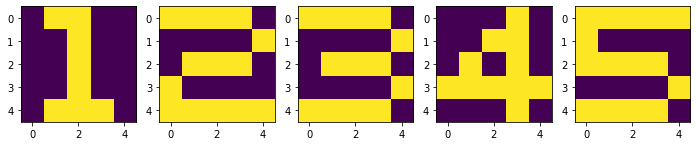

In [151]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])
plt.show()

In [152]:
def ReLU(x):
    return np.maximum(0, x)

In [153]:
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = ReLU(v)
    return y, v1, v2, v3, y1, y2, y3

In [154]:
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = (v3 > 0)*e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0)*e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0)*e1

    return delta, delta1, delta2, delta3

In [155]:
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y2.T
    W4 = W4 + dW4
    dW3 = alpha * delta3 * y3.T
    W3 = W3 + dW3
    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2
    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [156]:
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [157]:
W1= 2*np.random.random((20, 25)) - 1
W2= 2*np.random.random((20, 20)) - 1
W3= 2*np.random.random((20, 20)) - 1
W4= 2*np.random.random((5, 20)) - 1

alpha = 0.01
for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

In [158]:
def verify_algo(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y

In [159]:
N = 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25, 1))
    y = verify_algo(x, W1, W2, W3, W4)
    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('-------------------------------')

Y = 1: 
[1]
[[0.7796446 ]
 [0.00950814]
 [0.00442779]
 [0.19048005]
 [0.01593943]]
-------------------------------
Y = 2: 
[1]
[[8.20077054e-01]
 [8.80720587e-04]
 [1.99970515e-05]
 [1.79005341e-01]
 [1.68873849e-05]]
-------------------------------
Y = 3: 
[1]
[[9.32389537e-01]
 [3.49668402e-02]
 [4.87330418e-04]
 [3.21383114e-02]
 [1.79811682e-05]]
-------------------------------
Y = 4: 
[4]
[[3.77236125e-02]
 [1.13292254e-09]
 [1.36506895e-09]
 [9.11750453e-01]
 [5.05259319e-02]]
-------------------------------
Y = 5: 
[2]
[[3.32167606e-01]
 [6.28545597e-01]
 [3.13627526e-02]
 [7.90628166e-03]
 [1.77624918e-05]]
-------------------------------


In [160]:
X_test = np.zeros((5, 5, 5))

X_test[:, :, 0] = [[0,0,0,0,0], [0,1,0,0,0], [1,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0]]
X_test[:, :, 1] = [[1,1,1,1,0], [0,0,0,0,0], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0]]
X_test[:, :, 2] = [[0,0,0,1,0], [0,0,1,1,0], [0,1,0,0,0], [1,1,1,0,1], [0,0,0,1,0]]
X_test[:, :, 3] = [[1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,0,0]]
X_test[:, :, 4] = [[0,1,1,1,1], [1,1,0,0,0], [1,1,1,1,0], [0,0,0,1,1], [1,1,1,1,0]]

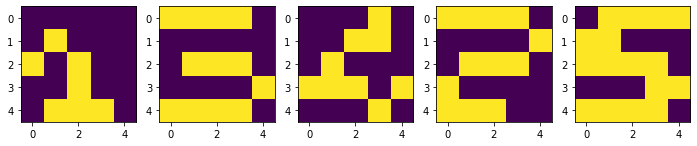

In [161]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X_test[:, :, n])
plt.show()

In [162]:
learning_result = [0,0,0,0,0]

for k in range(5):
    x = np.reshape(X_test[:, :, k], (25, 1))
    y = verify_algo(x, W1, W2, W3, W4)
    learning_result[k] = np.argmax(y, axis=0)+1
    
    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0)+1)
    print(y)
    print('-------------------------------')

Y = 1: 
[3]
[[0.00333455]
 [0.19178726]
 [0.47465089]
 [0.3277514 ]
 [0.00247589]]
-------------------------------
Y = 2: 
[1]
[[9.36391199e-01]
 [3.02072054e-02]
 [5.93649993e-04]
 [3.27617319e-02]
 [4.62135010e-05]]
-------------------------------
Y = 3: 
[5]
[[4.60722332e-05]
 [1.65875958e-06]
 [8.77137709e-07]
 [1.30414146e-02]
 [9.86909977e-01]]
-------------------------------
Y = 4: 
[1]
[[9.87022715e-01]
 [9.84883279e-04]
 [1.44665887e-05]
 [1.19773330e-02]
 [6.02142479e-07]]
-------------------------------
Y = 5: 
[2]
[[1.83335158e-01]
 [7.95352387e-01]
 [2.00476813e-02]
 [1.26393790e-03]
 [8.34942193e-07]]
-------------------------------


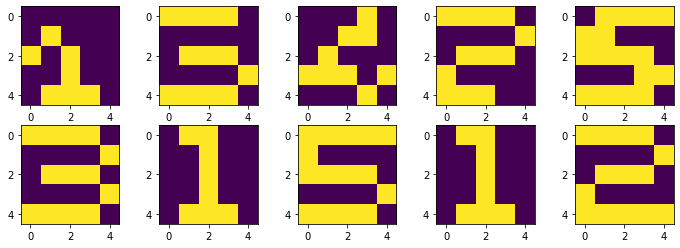

In [163]:
plt.figure(figsize=(12,4))
for n in range(N):
    plt.subplot(2, 5, n+1)
    plt.imshow(X_test[:, :, n])
    plt.subplot(2, 5, n+6)
    plt.imshow(X[:, :, learning_result[n][0]-1])
plt.show()

In [164]:
def Droupout(y, ratio):
    ym = np.zeros_like(y)
    num= round(y.size*(1-ratio))
    idx= np.random.choice(y.size, num, replace=False)
    ym[idx] = 1.0 / (1.0-ratio)

    return ym

In [165]:
def calcOutput_Droupout(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
    y1 = Sigmoid(v1)
    y1 = y1 * Droupout(y1, 0.2)
    v2 = np.matmul(W2, y1)
    y2 = Sigmoid(v2)
    y2 = y2 * Droupout(y2, 0.2)
    v3 = np.matmul(W3, y2)
    y3 = Sigmoid(v3)
    y3 = y3 * Droupout(y3, 0.2)
    v = np.matmul(W4, y3)
    y = Softmax(v)
    return y, v1, v2, v3, y1, y2, y3

In [170]:
def backpropagation_Dropout(d, y, y1, y2, y3, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e

    e3 = np.matmul(W4.T, delta)
    delta3 = y3 * (1-y3) * e3

    e2 = np.matmul(W3.T, delta3)
    delta2 = y2 * (1-y2) * e2
    
    e1 = np.matmul(W2.T, delta2)
    delta1 = y1 * (1-y1) * e1

    return delta, delta1, delta2, delta3

In [171]:
def DeepDropout(W1, W2, W3, W4, X, D):
    for k in range(5):
        x = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_Droupout(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_Dropout(d, y, W2, W3, W4, y1, y2, y3, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

        return W1, W2, W3, W4

In [172]:
W1= 2*np.random.random((20, 25)) - 1
W2= 2*np.random.random((20, 20)) - 1
W3= 2*np.random.random((20, 20)) - 1
W4= 2*np.random.random((5, 20)) - 1

for epoch in tqdm_notebook(range(10000)):
    W1, W2, W3, W4 = DeepDropout(W1, W2, W3, W4, X, D)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 20)